In [1]:
import time
t1 = time.time()

In [2]:
# Some magic so that the notebook will reload external python modules
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
# Ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

Change directory to julia_clusters

In [4]:
import os
os.chdir('/_/_/_/_/_/_/julia_clusters')

In [5]:
from scripts import *

In [6]:
import javabridge
import bioformats

In [7]:
import matplotlib.pyplot as plt

In [8]:
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [9]:
javabridge.start_vm(class_path=bioformats.JARS)

In [10]:
path = "/_/_/_/_/_/_/2018-10-13 Ctrl 247_0 wholemount ANNA staining.lif"

In [11]:
_, directory, mip, meta = io.load_bioformats(path)

In [12]:
javabridge.kill_vm()

(-0.5, 4495.5, 4495.5, -0.5)

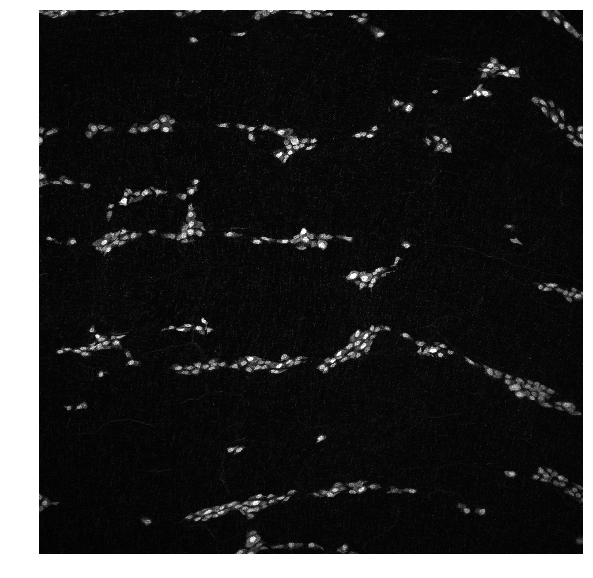

In [13]:
plt.imshow(mip)
plt.axis('off')

### Difference paramaters can be adjusted for the function clusters:

1 - sigma to adjust how much smoothing of the image is needed  
2 - min_distance to chose the minimum distance between peeks   
3 - eps to adjust the minimum distance between cells to be part of the same cluster   
4 - min_samples to adjust the minimum of cells necessary to form a cluster

In [14]:
sigma=9 
min_distance =27 
eps=0.15
min_samples = 6

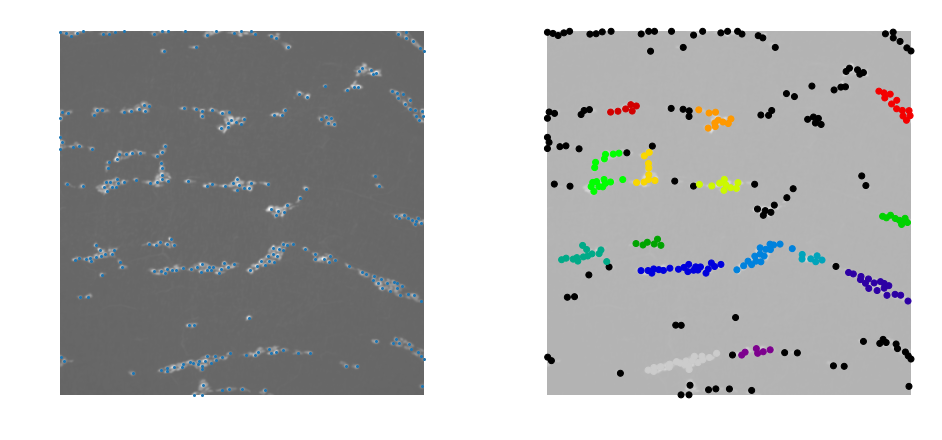

In [15]:
local_maxi, labels, gauss = processing.clusters(mip, 
                                                sigma=sigma, 
                                                min_distance = min_distance, 
                                                eps=eps, 
                                                min_samples = min_samples)

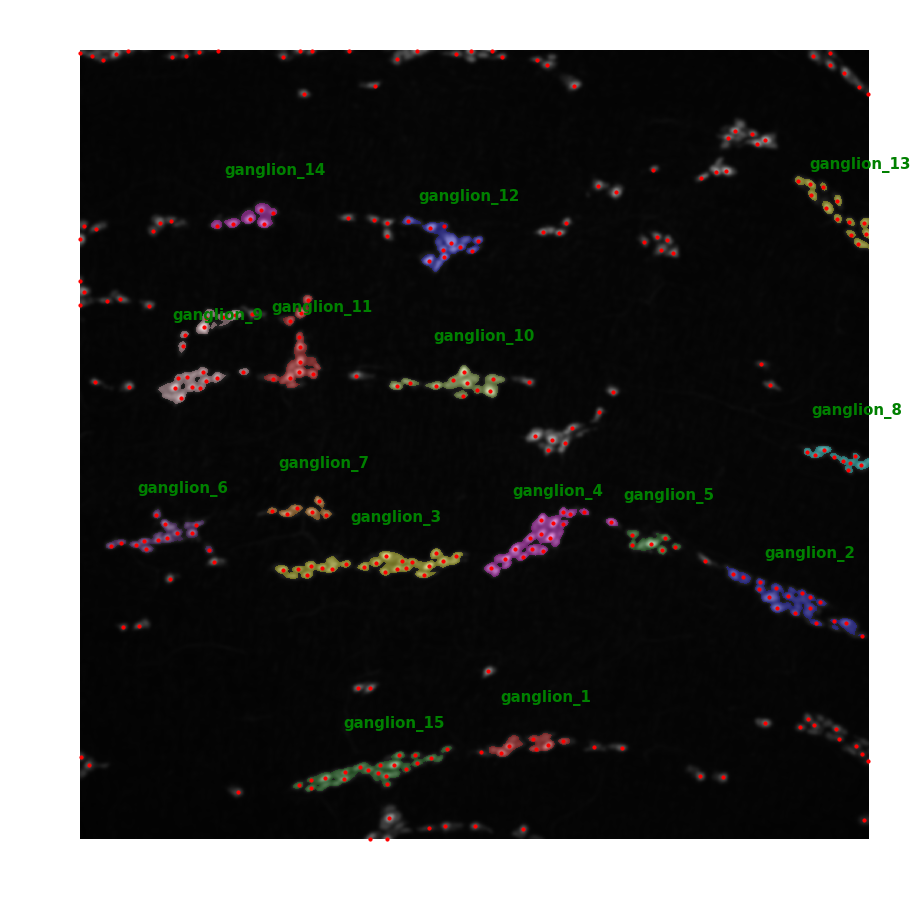

In [16]:
ganglion_prop = processing.segmentation(gauss, local_maxi, labels, meta, directory, save = True)

In [17]:
df = analysis.create_dataframe(ganglion_prop, local_maxi, meta, directory, save=True)

In [18]:
df

,ganglion,Nbr of neurons,surface ganglion in µm2,major axis length in µm,minor axis length in µm,orientation
0,background,288.0,NaN,NaN,NaN,NaN
1,1,6.0,25681.0,81.018660,16.988261,0.134303
2,2,17.0,60127.0,132.548154,24.877134,-0.417979
3,3,20.0,71722.0,197.206189,20.684552,0.055372
4,4,16.0,66640.0,117.766985,32.311690,0.521681
5,5,6.0,19811.0,51.945297,19.809532,-0.132687
6,6,13.0,37929.0,93.920619,32.375178,0.176339
7,7,6.0,16957.0,65.149934,17.912839,0.032777
8,8,9.0,18926.0,73.100886,15.303647,-0.267452
9,9,16.0,58007.0,125.177469,55.347540,1.060698


In [19]:
to_save = {'sigma' : sigma,
           'min_distance' :min_distance,
           'eps' : eps,
           'min_samples' : min_samples}

log.log_file(directory, meta, **to_save)

In [20]:
t2 = time.time()
print(t2-t1)

210.13972902297974
